In [12]:
import skimage.io
import jview
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [23]:
def read_h5(file_path, datasets):
    ims = []
    with h5py.File(file_path, 'r') as f:
        if datasets is None:
            print("Datasets in file: ", f.keys())
            return 
        for dataset in datasets:
            ims.append(f[dataset][:])
    return ims


In [24]:
dataset = 'SAM'
DATASET_PATH = os.path.join('/scratch/ottosson/datasets', dataset)
PLANTSEG_PATH = os.path.join(DATASET_PATH, 'plantseg_training')
TRAIN_PATH = os.path.join(DATASET_PATH, 'plantseg_training','train')
VAL_PATH = os.path.join(DATASET_PATH, 'plantseg_training', 'val')

In [25]:
print("Plantseg path exist: ", os.path.isdir(PLANTSEG_PATH))
print("Train path exist: ", os.path.isdir(TRAIN_PATH))
print("VAL path exist: ", os.path.isdir(VAL_PATH))
print(f"Train dir has {len(os.listdir(TRAIN_PATH))} files")
print(f"Val dir has {len(os.listdir(VAL_PATH))} files")

Plantseg path exist:  True
Train path exist:  True
VAL path exist:  True
Train dir has 121 files
Val dir has 4 files


# What is in the dir

In [26]:
files = os.listdir(TRAIN_PATH)
num_file_types = defaultdict(int)
for f in files:
    num_file_types[jview.get_extention(f)] +=1
print("TRAIN: Number of different files (based on extentions)")
jview.print_dir(num_file_types)

files = os.listdir(VAL_PATH)
num_file_types = defaultdict(int)
for f in files:
    num_file_types[jview.get_extention(f)] +=1
print("VAL: Number of different files (based on extentions)")
jview.print_dir(num_file_types)

TRAIN: Number of different files (based on extentions)
h5 :  121
VAL: Number of different files (based on extentions)
h5 :  4


# What is in the files?

In [36]:
path = TRAIN_PATH
ndims = defaultdict(list)
shapes = defaultdict(list)
dtypes = defaultdict(list)
mins = defaultdict(list)
maxs = defaultdict(list)
for f in os.listdir(path):
    if jview.get_extention(f) != 'h5': continue
    raw, label = read_h5(os.path.join(path, f), ['raw', 'label'])
    for img_type, im in zip(['raw', 'label'], [raw, label]):
        ndims[img_type].append(im.ndim)
        dtypes[img_type].append(im.dtype)
        mins[img_type].append(im.min())
        maxs[img_type].append(im.max())
print("TRAIN info")
for img_type in ['raw', 'label']:
    print("Image type: ", img_type)    
    print("\tNdims: ", np.unique(np.array(ndims[img_type])))
    print("\tdtypes: ", np.unique(np.array(dtypes[img_type])))
    print("\tmins: ", np.min(mins[img_type]), " - ", np.max(mins[img_type]))
    print("\tmaxs: ", np.min(maxs[img_type]), " - ", np.max(maxs[img_type]))

TRAIN info
Image type:  raw
	Ndims:  [3]
	dtypes:  [dtype('uint8')]
	mins:  0  -  0
	maxs:  222  -  255
Image type:  label
	Ndims:  [3]
	dtypes:  [dtype('uint16')]
	mins:  0  -  0
	maxs:  327  -  1698


In [37]:
path = VAL_PATH
ndims = defaultdict(list)
shapes = defaultdict(list)
dtypes = defaultdict(list)
mins = defaultdict(list)
maxs = defaultdict(list)
for f in os.listdir(path):
    if jview.get_extention(f) != 'h5': continue
    raw, label = read_h5(os.path.join(path, f), ['raw', 'label'])
    for img_type, im in zip(['raw', 'label'], [raw, label]):
        ndims[img_type].append(im.ndim)
        dtypes[img_type].append(im.dtype)
        mins[img_type].append(im.min())
        maxs[img_type].append(im.max())
print("VAL info")
for img_type in ['raw', 'label']:
    print("Image type: ", img_type)    
    print("\tNdims: ", np.unique(np.array(ndims[img_type])))
    print("\tdtypes: ", np.unique(np.array(dtypes[img_type])))
    print("\tmins: ", np.min(mins[img_type]), " - ", np.max(mins[img_type]))
    print("\tmaxs: ", np.min(maxs[img_type]), " - ", np.max(maxs[img_type]))

VAL info
Image type:  raw
	Ndims:  [3]
	dtypes:  [dtype('uint8')]
	mins:  0  -  0
	maxs:  242  -  255
Image type:  label
	Ndims:  [3]
	dtypes:  [dtype('uint16')]
	mins:  0  -  0
	maxs:  513  -  1153


# Plot images

In [29]:
path = TRAIN_PATH
filename = os.listdir(path)[0]
sample_name = filename.split('_')[0]+'_'+filename.split('_')[1]
raw, label = read_h5(os.path.join(path,filename), datasets= ['raw', 'label'])

In [30]:
def random_labeling(label, start_label = 1, min_color = 100):
    label=label.astype(int)
    # label to color
    l2c = np.random.randint(min_color, 255, size = (label.max()+1,))
    for l in range(start_label):
        l2c[l] = l
    label_ = np.zeros_like(label)
    for l in np.unique(label):
        if l < start_label: continue
        label_[label==l] = l2c[l]
    return label_


In [31]:
print("Raw sample shape: ", raw.shape)
print("Label sample shape: ", label.shape)

Raw sample shape:  (219, 512, 512)
Label sample shape:  (219, 512, 512)


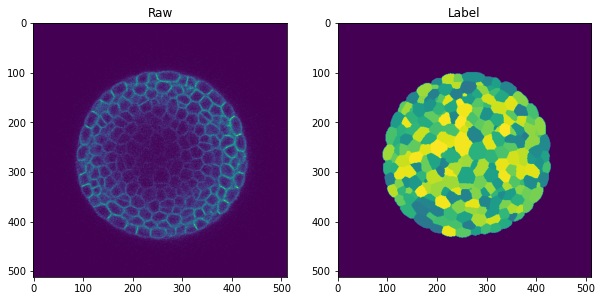

In [32]:
z_slice = 40
fig,axs = plt.subplots(1,2)
axs[0].imshow(raw[z_slice])
axs[0].set_title('Raw')
axs[1].imshow(random_labeling(label[z_slice], start_label = 2))
axs[1].set_title('Label')
fig.set_size_inches(10,7)

In [35]:
path = VAL_PATH
for f in os.listdir(path):
    if jview.get_extention(f) != 'h5': continue
    raw, label = read_h5(os.path.join(path, f), ['raw', 'label'])
    label[label == 1] = 0
    label[label == label.max()] = 1
    # write to file
    with h5py.File(os.path.join(path, f), "w") as hf:
        dset = hf.create_dataset("raw", data = raw)
        dset = hf.create_dataset("label", data = label)
